Install necessary libraries

In [2]:
!pip install matplotlib scikit-learn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Generate synthetic data

In [8]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

Fit K-means model

In [9]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Visualize the clusters

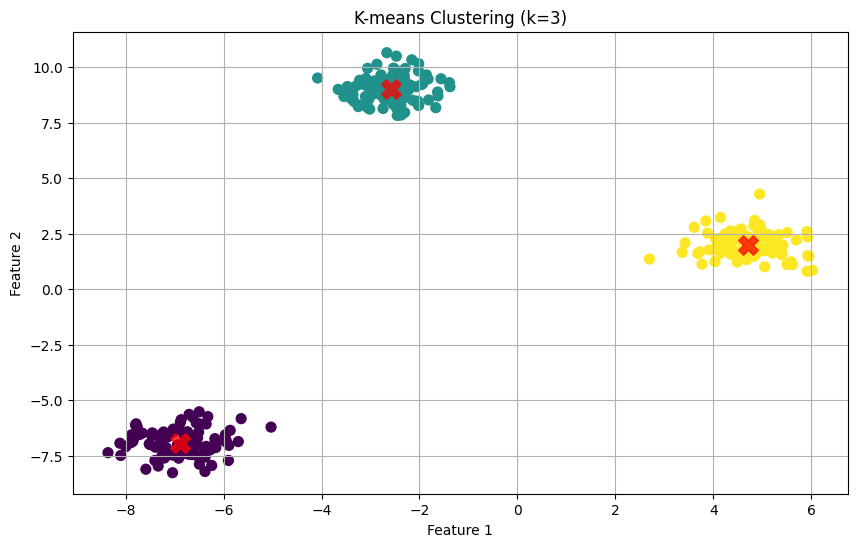

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Mark centers
plt.title('K-means Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

Calculate essential metrics for evaluation

# Inertia
Definition: Inertia is a measure of how tightly the clusters are packed.

It quantifies how far the data points in a cluster are from the centroid of that cluster.

A lower inertia value indicates more compact clusters.

Formula: Inertia = ∑(x ∈ C_i) ||x - μ_i||², where:
- k is the number of clusters.
- C_i is the set of points in cluster i.
- μ_i is the centroid of cluster i.
- ||x - μ_i||² is the squared Euclidean distance between point x and centroid μ_i.
inertia_value = kmeans.inertia_  # Sum of squared distances to closest centroid

# Silhouette Score

Definition: The silhouette score measures how similar a data point is to its own cluster

compared to other clusters. It ranges from -1 to 1; higher values indicate better clustering.

Formula for a single point i: s(i) = (b(i) - a(i)) / max(a(i), b(i)), where:
- a(i) is the average distance between point i and all other points in the same cluster.
- b(i) is the average distance between point i and all points in the nearest cluster.

Overall silhouette score = (1/n) ∑ s(i), where n is the total number of data points.

In [11]:
inertia_value = kmeans.inertia_  # Sum of squared distances to closest centroid
silhouette_avg = silhouette_score(X, y_kmeans)  # Mean silhouette score

print(f"Inertia: {inertia_value:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")

Inertia: 204.07
Silhouette Score: 0.91
